# Social Media Mining: PANDAS
### Vincent Malic - Spring 2018
## Module 6.1 Python Pandas Library

## Working with data in Tables
* Here is a sample dataset, a list of lists
* Four lists, with four attributes or features

In [1]:
data = [["Oleg", 25, "Student", "Computer Science"],
       ["Anaya", 23, "Student", "informatics"],
       ["Xiuying", 43, "Professor", "Statistics"],
       ["Robert", 62, "Professor", "Computer Science"]]

## Find the department a person is in:
* One approach is to use indexing to slice the data set

In [2]:
data[2][3]

'Statistics'

### If we don't know the department 
* Can iterate throught the dataset, list by list
* Unit it hits on given name and returns the desired info

In [3]:
for row in data:
    name = row[0]
    if name == "Xiuying":
        department = row[3]
        print(department)

Statistics


# Pandas `DataFrame` object
* Data is organized in table format, DataFrame in table format
* We can call pandas data frame function with data as argument
* Returns a dataframe, and we add column names

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(data)
df

,0,1,2,3
0,Oleg,25,Student,Computer Science
1,Anaya,23,Student,informatics
2,Xiuying,43,Professor,Statistics
3,Robert,62,Professor,Computer Science


In [6]:
df.columns = ["Name", "Age", "Status", "Department"]
df

,Name,Age,Status,Department
0,Oleg,25,Student,Computer Science
1,Anaya,23,Student,informatics
2,Xiuying,43,Professor,Statistics
3,Robert,62,Professor,Computer Science


### Select data using indexing and column names

In [7]:
df.loc[2]['Department']

'Statistics'

# Load Social Media Data
* Initialize empty list for tweet_data
* Iterate over 500 tweets, select key info about tweet
* Append info into the tweet_data list

In [8]:
API_KEY = ""
API_SECRET = ""

In [9]:
import tweepy

auth = tweepy.AppAuthHandler(API_KEY, API_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

c = tweepy.Cursor(api.user_timeline, id="IUBloomington")

In [10]:
tweet_data = []

for tweet in c.items(500):
    tid = tweet.id
    hour_created = tweet.created_at.hour
    favorite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    source = tweet.source
    text = tweet.text
    this_tweet = [tid, hour_created, source, text, favorite_count, retweet_count]
    tweet_data.append(this_tweet)
    

In [11]:
tweet_data[:2]

[[967145459054718976,
  21,
  'Twitter Web Client',
  'RT @IUStudentLife: Come celebrate Black History Month with @IULateNite at the @OfficialIMU tonight! From 9pm to 1am, dance, do arts and cra…',
  0,
  2],
 [967145385650278402,
  21,
  'Twitter Web Client',
  'RT @unionboard: Come celebrate Black History Month with Late Nite! TONIGHT from 9PM-1AM, join us in the Union Commons for music, food, game…',
  0,
  3]]

## Put tweet_data into Pandas dataFrame
* Use dataFrame function, with tweet_data as argument
* Label the column so that we can subset dataFrame
* Designate twitter id "tid" as index label

In [12]:
df = pd.DataFrame(tweet_data)
df.columns = ["tid","hour_created","source","text","favorite_count","retweet_count"]

df.head()

,tid,hour_created,source,text,favorite_count,retweet_count
0,967145459054718976,21,Twitter Web Client,RT @IUStudentLife: Come celebrate Black Histor...,0,2
1,967145385650278402,21,Twitter Web Client,RT @unionboard: Come celebrate Black History M...,0,3
2,967122650047963136,19,Twitter Web Client,"Before tonight's @IndianaMBB game, meet the 3 ...",18,5
3,967120052343525379,19,Twitter Web Client,RT @IndianaMBB: One last time for our seniors ...,0,63
4,967119396874457088,19,Twitter Web Client,"RT @InsideIU: Campus Commute, which transports...",0,3


In [14]:
df.index = df['tid']
df.head()

,tid,hour_created,source,text,favorite_count,retweet_count
tid,,,,,,
967145459054718976,967145459054718976,21,Twitter Web Client,RT @IUStudentLife: Come celebrate Black Histor...,0,2
967145385650278402,967145385650278402,21,Twitter Web Client,RT @unionboard: Come celebrate Black History M...,0,3
967122650047963136,967122650047963136,19,Twitter Web Client,"Before tonight's @IndianaMBB game, meet the 3 ...",18,5
967120052343525379,967120052343525379,19,Twitter Web Client,RT @IndianaMBB: One last time for our seniors ...,0,63
967119396874457088,967119396874457088,19,Twitter Web Client,"RT @InsideIU: Campus Commute, which transports...",0,3


In [15]:
del df['tid']
df.head()

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
967145459054718976,21,Twitter Web Client,RT @IUStudentLife: Come celebrate Black Histor...,0,2
967145385650278402,21,Twitter Web Client,RT @unionboard: Come celebrate Black History M...,0,3
967122650047963136,19,Twitter Web Client,"Before tonight's @IndianaMBB game, meet the 3 ...",18,5
967120052343525379,19,Twitter Web Client,RT @IndianaMBB: One last time for our seniors ...,0,63
967119396874457088,19,Twitter Web Client,"RT @InsideIU: Campus Commute, which transports...",0,3


## Selecting Columns in a DataFrame
* Subset the dataset, select a column using name inside bracket notation
* Subset by list of strings, to return more than one column

In [24]:
sample = df.head()
sample["text"]

tid
967145459054718976    RT @IUStudentLife: Come celebrate Black Histor...
967145385650278402    RT @unionboard: Come celebrate Black History M...
967122650047963136    Before tonight's @IndianaMBB game, meet the 3 ...
967120052343525379    RT @IndianaMBB: One last time for our seniors ...
967119396874457088    RT @InsideIU: Campus Commute, which transports...
Name: text, dtype: object

In [19]:
sample[["hour_created", "source"]]

,hour_created,source
tid,,
967145459054718976,21,Twitter Web Client
967145385650278402,21,Twitter Web Client
967122650047963136,19,Twitter Web Client
967120052343525379,19,Twitter Web Client
967119396874457088,19,Twitter Web Client


## Label-based indexing for rows: `loc` method
* Put the name of the row that you want in the brackets with loc method

In [20]:
sample.loc[967120052343525379	]

hour_created                                                     19
source                                           Twitter Web Client
text              RT @IndianaMBB: One last time for our seniors ...
favorite_count                                                    0
retweet_count                                                    63
Name: 967120052343525379, dtype: object

In [21]:
sample.loc[[967120052343525379,967119396874457088]]

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
967120052343525379,19,Twitter Web Client,RT @IndianaMBB: One last time for our seniors ...,0,63
967119396874457088,19,Twitter Web Client,"RT @InsideIU: Campus Commute, which transports...",0,3


## Positional Index to find a particular row: `iloc` method
* Use iloc method to select the row that is in position 2
* Pasa list of positions to get more than one item, second and fourth rows

In [22]:
sample.iloc[2]

hour_created                                                     19
source                                           Twitter Web Client
text              Before tonight's @IndianaMBB game, meet the 3 ...
favorite_count                                                   18
retweet_count                                                     5
Name: 967122650047963136, dtype: object

In [23]:
sample.iloc[[1,3]]

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
967145385650278402,21,Twitter Web Client,RT @unionboard: Come celebrate Black History M...,0,3
967120052343525379,19,Twitter Web Client,RT @IndianaMBB: One last time for our seniors ...,0,63


## Use loc and iloc to select particular cell in DF
* Pass name of row and name of the column at the same time
* Pass multiple values to row and columns
* What is before comma in brackets is ROWS, after the comma is COLUMNS

In [25]:
sample.loc[967122650047963136, "source"]

'Twitter Web Client'

In [30]:
# Select two rows and two columns
sample.loc[[967120052343525379,967119396874457088],["source", "text"]]

,source,text
tid,,
967120052343525379,Twitter Web Client,RT @IndianaMBB: One last time for our seniors ...
967119396874457088,Twitter Web Client,"RT @InsideIU: Campus Commute, which transports..."


# Boolean Indexing
* Subsetting the rows by TRUE and FALSE statements

In [34]:
# Create ROW index for this and fifth rows
b_index = [False, False, True, False, True]

sample[b_index]

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
967122650047963136,19,Twitter Web Client,"Before tonight's @IndianaMBB game, meet the 3 ...",18,5
967119396874457088,19,Twitter Web Client,"RT @InsideIU: Campus Commute, which transports...",0,3


## Conditional Subsetting
* Take subset of data that meets a condition of our research
* Want to analyze most popular tweets: favoriate_count > 5
* Need Boolean indexing and booleans on a column of data

### Use Boolean operator on entire Column
* Want to take a subset of all rows that  meet this condition
* Use Boolean indexing on this subset

In [35]:
sample["favorite_count"]

tid
967145459054718976     0
967145385650278402     0
967122650047963136    18
967120052343525379     0
967119396874457088     0
Name: favorite_count, dtype: int64

In [36]:
sample["favorite_count"] > 0 

tid
967145459054718976    False
967145385650278402    False
967122650047963136     True
967120052343525379    False
967119396874457088    False
Name: favorite_count, dtype: bool

In [37]:
meets_conditions = sample["favorite_count"] > 0 

In [39]:
# Data is subset according to a particular condition

row_meets_conditions = sample[meets_conditions]
row_meets_conditions

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
967122650047963136,19,Twitter Web Client,"Before tonight's @IndianaMBB game, meet the 3 ...",18,5


## Look at original dataset
* Do the same Boolean subsetting on entire dataset
* Df has 500 instances and 5 rows

In [40]:
df.shape

(500, 5)

In [42]:
subset = df[ df['favorite_count'] > 0 ]
subset.shape

(212, 5)

### Subset of non-zero favorite counts returns 212 tweets
* Subset of tweets sent from iPhone using double bracket index
* Returns 56 tweets from Twitter iPhone

In [43]:
subset.head()

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
967122650047963136,19,Twitter Web Client,"Before tonight's @IndianaMBB game, meet the 3 ...",18,5
967080829397725184,16,Twitter Web Client,We are proud to be one of the top public unive...,18,10
967052484995960832,15,Twitter Web Client,Guardian of the Galaxy: Professor Lisa Pratt d...,33,8
966888513626030080,4,Sprout Social,@thevirdas @IUAHCouncil Thank you for sharing ...,3,0
966778382963953664,20,Sprout Social,@zachy__t @IUBCampusBus,4,0


In [44]:
iphonetweets = df[df['source'] == "Twitter for iPhone"]
iphonetweets.shape

(56, 5)

In [46]:
iphonetweets.head()

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
966165408704270337,4,Twitter for iPhone,RT @IUHoosiers: Eight straight B1G wins ties a...,0,33
966165307101515779,4,Twitter for iPhone,RT @IndianaWBB: Make it 8-straight! \n\nHoosie...,0,106
966067062111121413,21,Twitter for iPhone,Did someone request a day of spring? You're we...,229,15
966066038168223744,21,Twitter for iPhone,RT @IndianaMBB: B1G game tonight vs. the Huske...,0,45
965261806506795008,16,Twitter for iPhone,RT @ACC_IU: Don't forget! Tomorrow we will be ...,0,3


# Explore the data using PANDAS
* Isolate a single column, 'favorites', assign to variable
* Can obtain descriptives using dataFrame methods (mean, std, max)
* `Describe` method provides summary of data, "five figure summary"

In [48]:
favorites = df['favorite_count']

In [49]:
favorites.mean()

17.772

In [50]:
favorites.std()

66.10373229134389

In [51]:
favorites.max()

684

In [52]:
favorites.describe()

count    500.000000
mean      17.772000
std       66.103732
min        0.000000
25%        0.000000
50%        0.000000
75%        9.000000
max      684.000000
Name: favorite_count, dtype: float64

## Look at relation between Favorites and Retweet Count

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()

retweets = df['retweet_count']

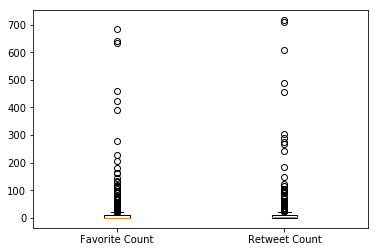

In [68]:
plt.boxplot([favorites, retweets], labels=["Favorite Count", "Retweet Count"])
plt.show()

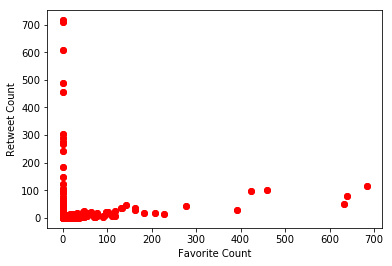

In [67]:
plt.plot(favorites, retweets, "ro")
plt.xlabel("Favorite Count")
plt.ylabel("Retweet Count")
plt.show()

### Scatterplot of Favorites by Retweets
* Plot shows there is not a strong relationship between favorites and retweets
* Large number of retweets that were never favorited (0).
* Removing outliers may show relationship

# `Group_by` function 
* Obtain ggregated statistics by category (iPhone, etc.) in Pandas DF
* Average number of favorites, retweets, from iPhone vs. Android
* Assign group by object to source_group, look at simple counts

In [69]:
source_group = df.groupby("source")
source_group

## Aggregated statistics from groupby object
* Indicate column to group by ["source"] and how to aggregate ("count") 
* Look at the mean (average) favorite_count for each source group

In [70]:
source_group["source"].agg("count")

source
Sprout Social          196
Twitter Web Client     219
Twitter for Android     14
Twitter for iPad        15
Twitter for iPhone      56
Name: source, dtype: int64

In [72]:
source_group["favorite_count"].agg("mean")

source
Sprout Social           6.892857
Twitter Web Client     21.694064
Twitter for Android    51.000000
Twitter for iPad       62.066667
Twitter for iPhone     20.339286
Name: favorite_count, dtype: float64

### Understand Characteristics of Dataset: What is Sprout Social?
* Although Sprout Social is the second highest source of tweets by source group
* The average favorite count for Sprout Social is significatnly lower than every other source
* See patterns and ask questions about the data (e.g., Sprout Social used to repond to tweets)

## Aggregate Statistics by Multiple Columns
* Returns descriptives by column

In [73]:
source_group[["favorite_count", "retweet_count"]].agg("mean")

,favorite_count,retweet_count
source,,
Sprout Social,6.892857,8.418367
Twitter Web Client,21.694064,20.260274
Twitter for Android,51.000000,3.071429
Twitter for iPad,62.066667,14.200000
Twitter for iPhone,20.339286,50.589286


## Save Data frame to external five with sav

In [75]:
df.to_csv("IUB500Tweets.csv")

## Load Data file from CSV

In [76]:
new_df = pd.read_csv("IUB500Tweets.csv", index_col=0, encoding="latin1")
new_df.head()

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
967145459054718976,21,Twitter Web Client,RT @IUStudentLife: Come celebrate Black Histor...,0,2
967145385650278402,21,Twitter Web Client,RT @unionboard: Come celebrate Black History M...,0,3
967122650047963136,19,Twitter Web Client,"Before tonight's @IndianaMBB game, meet the 3 ...",18,5
967120052343525379,19,Twitter Web Client,RT @IndianaMBB: One last time for our seniors ...,0,63
967119396874457088,19,Twitter Web Client,"RT @InsideIU: Campus Commute, which transports...",0,3


## PANDA and SKlearn: Iris dataset as DataFrame
* Construct dataFrame, identify features and target variables
* Use dataframe for classification with Iris dataset

In [78]:
import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()

alldata = np.hstack((iris.data, iris.target.reshape(-1,1)))
df = pd.DataFrame(alldata, columns=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [82]:
y = df["species"]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: species, dtype: float64

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [93]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.97999999999999998